## 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [1]:
# 1) 데이터 가져오기
# 당뇨병(diabetes) 데이터셋 예시로 보는 다중 선형 회귀
from sklearn.datasets import load_diabetes
data = load_diabetes()
df_X = data.data
df_y = data.target
type(df_X), type(df_y), df_X.dtype, df_y.dtype
# sklearn의 대부분의 dataset loader는 기본 출력이 NumPy 배열

(numpy.ndarray, numpy.ndarray, dtype('float64'), dtype('float64'))

In [2]:
df_X.shape, df_y.shape

((442, 10), (442,))

In [3]:
for i, feature_name in enumerate(data.feature_names):
    print(f'feature {i+1} : {feature_name}')

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


In [4]:
import pandas as pd
df_X = pd.DataFrame(data.data, columns = data.feature_names)
df_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [6]:
df_y = pd.DataFrame(data.target, columns = ['target']) # data.feature_names 이렇게 하면 안되는 이유는? 이거는 10개임
df_y = pd.Series(data.target, name = 'target') # columns가 아니라 네임임
df = pd.concat([df_X, df_y], axis=1)
df.head(), type(df)

(        age       sex       bmi        bp        s1        s2        s3  \
 0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 
          s4        s5        s6  target  
 0 -0.002592  0.019907 -0.017646   151.0  
 1 -0.039493 -0.068332 -0.092204    75.0  
 2 -0.002592  0.002861 -0.025930   141.0  
 3  0.034309  0.022688 -0.009362   206.0  
 4 -0.002592 -0.031988 -0.046641   135.0  ,
 pandas.core.frame.DataFrame)

In [7]:
# 2). 모델에 입력할 데이터 X 준비하기
import numpy as np
X = np.array(df_X)
type(X), X.dtype
# 명시적으로 NumPy 배열임을 보장하거나 통일하기 위한 습관적 코드
# pandas → NumPy로 변환할 때, 리스트 → NumPy, dtype을 강제하고 싶을 때-딥러닝(PyTorch, TensorFlow)에서 아주 중요하기 때문에 들이는 습관

(numpy.ndarray, dtype('float64'))

In [8]:
# 3). 모델에 입력할 데이터 y 준비하기
y = np.array(df_y)
type(y), y.dtype

(numpy.ndarray, dtype('float64'))

In [9]:
# 4) train 데이터와 test 데이터 분리하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 # 랜덤 시드(seed)를 고정하는 것
)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((353, 10), (353,), (89, 10), (89,))

In [10]:
# 5) 모델 준비하기
# 가중치
W = np.random.rand(X_train.shape[-1])# *0.1 # 0.1은 사실상 learning rate를 우회적으로 조절하는 효과도 있음.
b = np.random.rand()
print(len(W))
W

10


array([0.23642271, 0.2867327 , 0.18404641, 0.23811645, 0.7418991 ,
       0.82316519, 0.30227201, 0.67408928, 0.33794847, 0.44582151])

In [11]:
W = W * 0.1
W

array([0.02364227, 0.02867327, 0.01840464, 0.02381164, 0.07418991,
       0.08231652, 0.0302272 , 0.06740893, 0.03379485, 0.04458215])

In [12]:
# 모델 정의
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
X_3 = X_train[:3]
y_pred_3 = model(X_3, W, b)
X_3, y_pred_3

(array([[ 0.07076875,  0.05068012,  0.01211685,  0.0563009 ,  0.03420581,
          0.04941617, -0.03971921,  0.03430886,  0.02736405, -0.0010777 ],
        [-0.00914709,  0.05068012, -0.01806189, -0.03321323, -0.0208323 ,
          0.01215151, -0.07285395,  0.07120998,  0.00027248,  0.01963284],
        [ 0.00538306, -0.04464164,  0.04984027,  0.09761511, -0.01532849,
         -0.016345  , -0.00658447, -0.00259226,  0.01703607, -0.01350402]]),
 array([0.64276036, 0.63252695, 0.62868226]))

In [13]:
# W 파악
predictions = 0
for i in range(len(W)):
    print(f'feature {i}, W[{i}] = {W[i]:.4f}')
    predictions += X_3[:, i] * W[i]

predictions += b
predictions

feature 0, W[0] = 0.0236
feature 1, W[1] = 0.0287
feature 2, W[2] = 0.0184
feature 3, W[3] = 0.0238
feature 4, W[4] = 0.0742
feature 5, W[5] = 0.0823
feature 6, W[6] = 0.0302
feature 7, W[7] = 0.0674
feature 8, W[8] = 0.0338
feature 9, W[9] = 0.0446


array([0.64276036, 0.63252695, 0.62868226])

In [14]:
W = W * 10
X_3 = X_train[:3]
y_pred_3 = model(X_3, W, b)
X_3, y_pred_3 

(array([[ 0.07076875,  0.05068012,  0.01211685,  0.0563009 ,  0.03420581,
          0.04941617, -0.03971921,  0.03430886,  0.02736405, -0.0010777 ],
        [-0.00914709,  0.05068012, -0.01806189, -0.03321323, -0.0208323 ,
          0.01215151, -0.07285395,  0.07120998,  0.00027248,  0.01963284],
        [ 0.00538306, -0.04464164,  0.04984027,  0.09761511, -0.01532849,
         -0.016345  , -0.00658447, -0.00259226,  0.01703607, -0.01350402]]),
 array([0.76231867, 0.65998456, 0.62153764]))

In [15]:
# 6) 손실함수 loss 정의
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [16]:
# 7) 기울기를 구하는 gradient 함수 구현
# 모델 
# y^​=XW+b
# X: 입력 데이터 (N, n_features), W: 가중치 (n_features,) b: 편향 (스칼라)

# 손실함수(MSE) 
# L= 1/​N * ∑ ​(y^​i​−yi​)2 (i는 1부터 N까지)
# 목표 W와 b를 어느 방향으로 얼마나 바꿔야 손실 L이 줄어드는지 계산하는 것이 gradient 
# 최소 (손실)값을 구하는 기울기, 최소손실값으로 가기 위한 “방향과 속도”를 알기 위해 gradient를 구한다.
# gradient는 손실 함수를 미분한 값으로, 현재 위치에서 손실을 가장 빠르게 줄일 수 있는 방향과 그 변화율(속도)을 나타낸다.

def gradient(X, W, b, y):
    N = len(y) # 샘플 수
    y_pred = model(X, W, b) # 현재 파라미터 X, W, b로 계산한 예측값으로 수식은  y^​=XW+b

    dW = 1/N * 2 * X.T.dot(y_pred - y) # dW — 가중치에 대한 그래디언트

    # dW는 손실 함수 𝐿을 가중치 W에 대해 편미분한 값을 구하는 것 dW = ∂L / ∂W = (2/N) · Xᵀ · (ŷ − y)
    # 편미분: 여러 변수가 있는 함수에서, 나머지는 고정한 채 한 변수만 변화시켜 그 변화율을 구하는 미분:
    # (미분 대상)L를(기준 변수)W로 미분
    
    # 예측값과 실제값의 오차 벡터(y_pred - y)가
    #예측값 y_pred와 실제값 y가 둘 다 “샘플 수 N개짜리 1차원 벡터, shape이 (N,)인 1차원 벡터(길이가 N인 1차원 배열), size(전체 요소의 개수) N인 벡터
    # (N, 1) -> shape이 (N, 1)인, size가 N×1 = N인 2차원 배열(행렬)
    # 왜 X.T로 행렬의 곱(dot)을 하나 - 각 feature가 오차에 얼마나 기여했는지 계산, feature별로 미분값이 필요하기 때문
    # X: 입력 데이터 (N, n_features) ->  X.T → (n_features, N), (y_pred - y) → (N,) 결과 → (n_features,) ✅
    
    db = 2 * (y_pred - y).mean() #  db = ∂L / ∂b 
    
    # db = ∂L / ∂b = 2 * (y_pred - y).mean() 
    # # b는 오차 평균이 양수 → 예측이 전반적으로 큼 → b를 줄여야 함, 오차 평균이 음수 → 예측이 전반적으로 작음 → b를 늘려야 함
    # db는 손실 함수 L을 편향 b에 대해 편미분한 값으로, x^2을 미분하면 2*x가 되는 것처럼 2를 곱한 것이고
    #.mean()는 모든 샘플에 대한 오차 (y^−y)를 평균내는 것으로,손실 함수가 “평균 제곱 오차(MSE)”이기 때문
    
    return dW, db

In [17]:
# 7 기울기를 구하는 gradient 함수
def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

In [18]:
# 8 하이퍼 파라미터 학습률 설정
LEARNING_RATE = 0.001
# 하이퍼 파라미터 수정
LEARNING_RATE = 0.1
n_epoch = 3001

In [ ]:
# 9 모델 학습하기

In [19]:
%%timeit -n 1 -r 1
global W, b

losses = []

for i in range(1, n_epoch):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 5380.7402
Iteration 200 : Loss 4878.2657
Iteration 300 : Loss 4504.6120
Iteration 400 : Loss 4223.0572
Iteration 500 : Loss 4007.7670
Iteration 600 : Loss 3840.5222
Iteration 700 : Loss 3708.4342
Iteration 800 : Loss 3602.3506
Iteration 900 : Loss 3515.7405
Iteration 1000 : Loss 3443.9168
Iteration 1100 : Loss 3383.4913
Iteration 1200 : Loss 3331.9936
Iteration 1300 : Loss 3287.6048
Iteration 1400 : Loss 3248.9695
Iteration 1500 : Loss 3215.0646
Iteration 1600 : Loss 3185.1066
Iteration 1700 : Loss 3158.4861
Iteration 1800 : Loss 3134.7214
Iteration 1900 : Loss 3113.4257
Iteration 2000 : Loss 3094.2831
Iteration 2100 : Loss 3077.0323
Iteration 2200 : Loss 3061.4536
Iteration 2300 : Loss 3047.3603
Iteration 2400 : Loss 3034.5920
Iteration 2500 : Loss 3023.0096
Iteration 2600 : Loss 3012.4916
Iteration 2700 : Loss 3002.9308
Iteration 2800 : Loss 2994.2327
Iteration 2900 : Loss 2986.3132
Iteration 3000 : Loss 2979.0973
371 ms ± 0 ns per loop (mean ± std. dev. of 1 run

In [20]:
# 10 test 데이터에 대한 성능 확인하기
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(2870.339326015315)

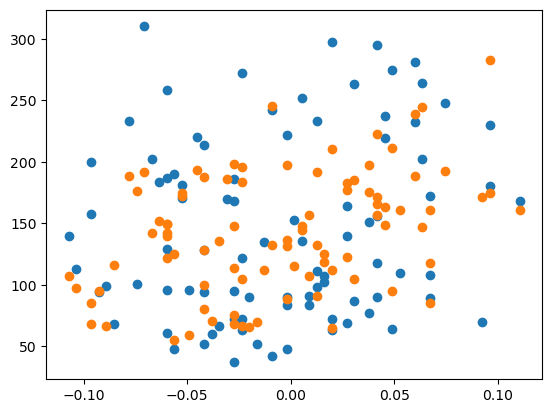

In [21]:
# 정답 데이터와 예측한 데이터 시각화하기
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

## 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [22]:
# 1 데이터 가져오기
import pandas as pd

train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv") 
train.info() # 데이터 요약

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [23]:
# 2. datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  minute      10886 non-

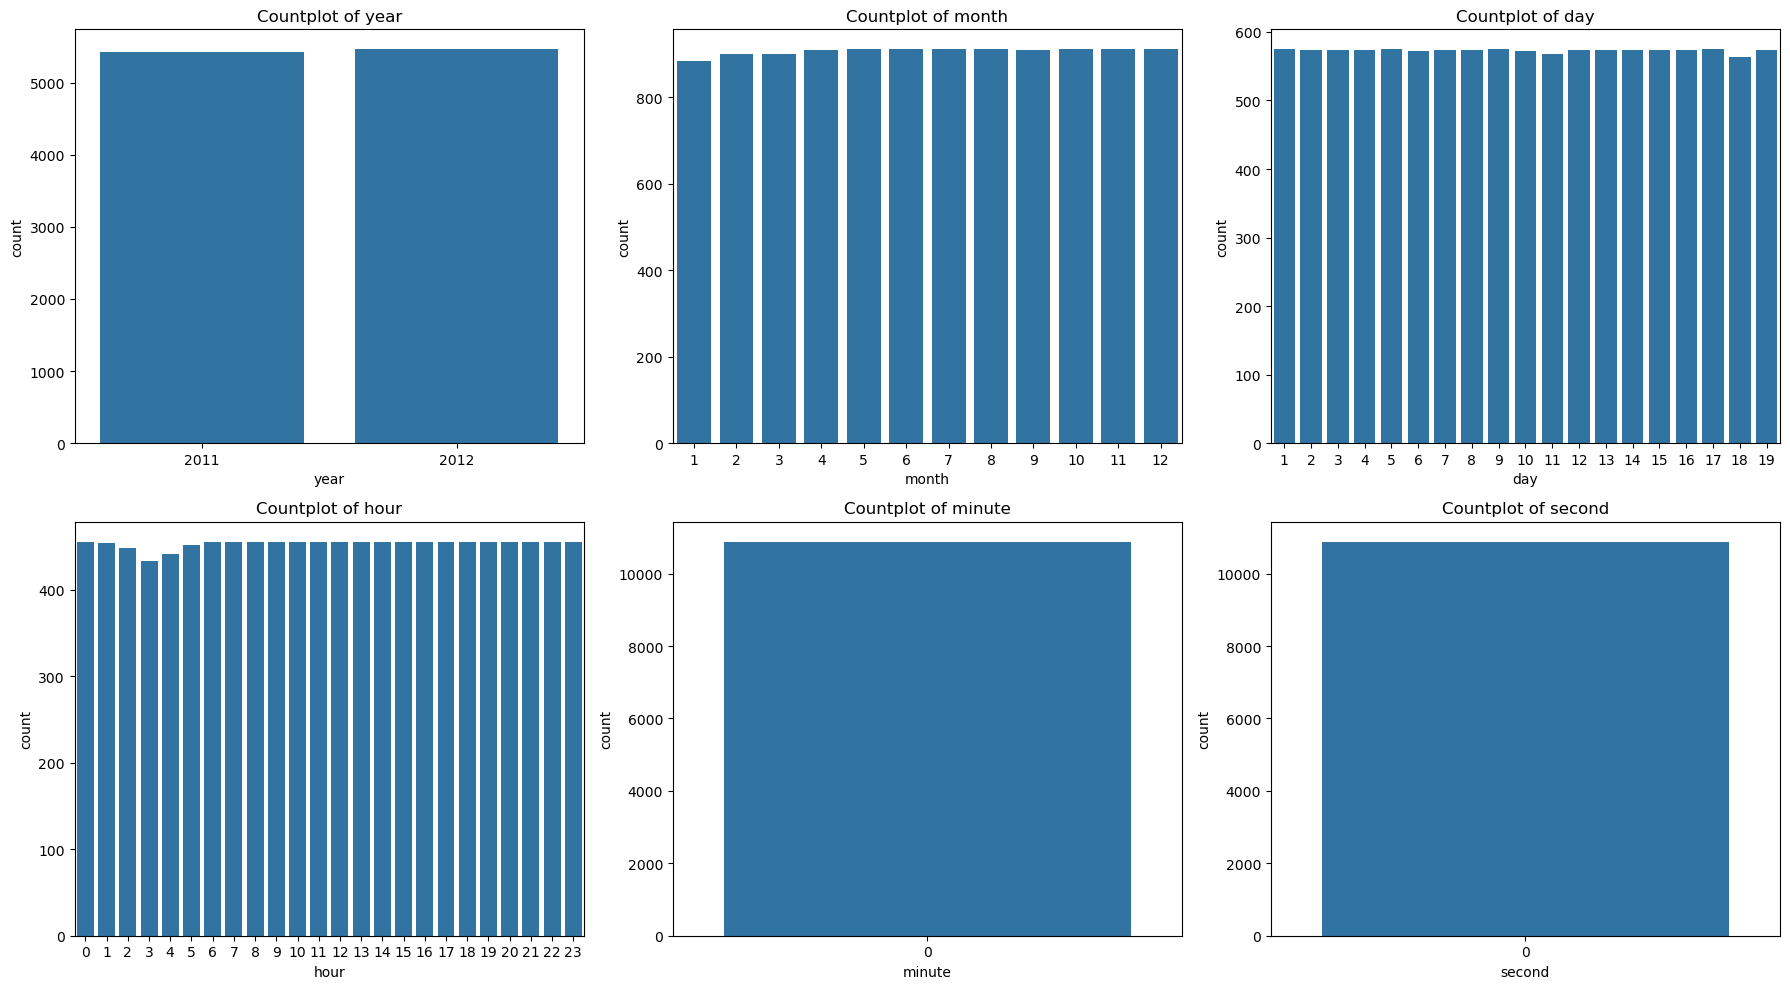

In [24]:
# 3. year, month, day, hour, minute, second 데이터 개수 시각화하기
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
cols = ['year', 'month', 'day', 'hour', 'minute', 'second']
for ax, col in zip(axs.flatten(), cols):
    sns.countplot(x=col, data=train, ax=ax)
    ax.set_title(f'Countplot of {col}')
plt.tight_layout()
plt.show() 

In [25]:
# 4 X, y 컬럼 선택 및 train/test 데이터 분리
features = ['year', 'month', 'day', 'hour', 'temp', 'humidity', 'windspeed']
X = train[features]
y = train['count'] # 해당 시간대 자전거 대여 건수 (예측 대상)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
# 5. LinearRegression 모델 학습
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
# 6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred) # mean_squared_error → 평균제곱오차(MSE) 계산
rmse = np.sqrt(mse) # np.sqrt → 루트 씌워서 RMSE 계산
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 19961.901814435438
RMSE: 141.2865946027274


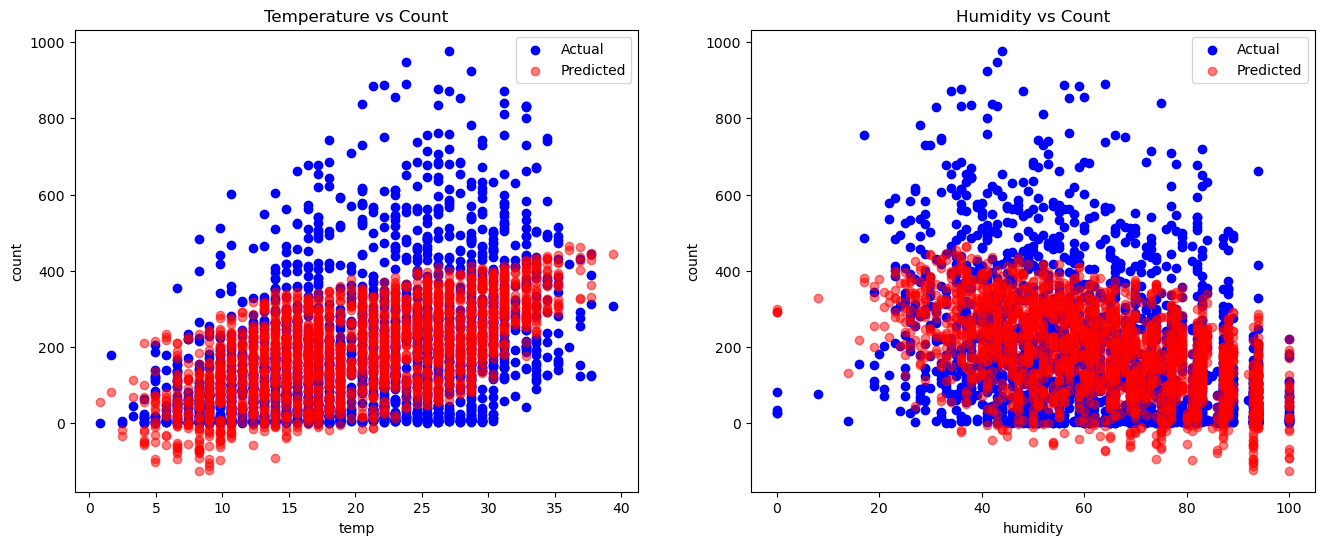

In [28]:
# 7. x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

# 온도·습도에 따른 실제 대여 수와 모델이 예측한 대여 수를 같은 그래프에 겹쳐서 비교

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# temp vs count 시각화
axs[0].scatter(X_test['temp'], y_test, color='blue', label='Actual') # 실제 자전거 대여 수
axs[0].scatter(X_test['temp'], y_pred, color='red', label='Predicted', alpha=0.5) # 모델 예측값, alpha=0.5 투명도(두점이 겹쳐보이게)조절
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

# humidity vs count 시각화
axs[1].scatter(X_test['humidity'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['humidity'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()

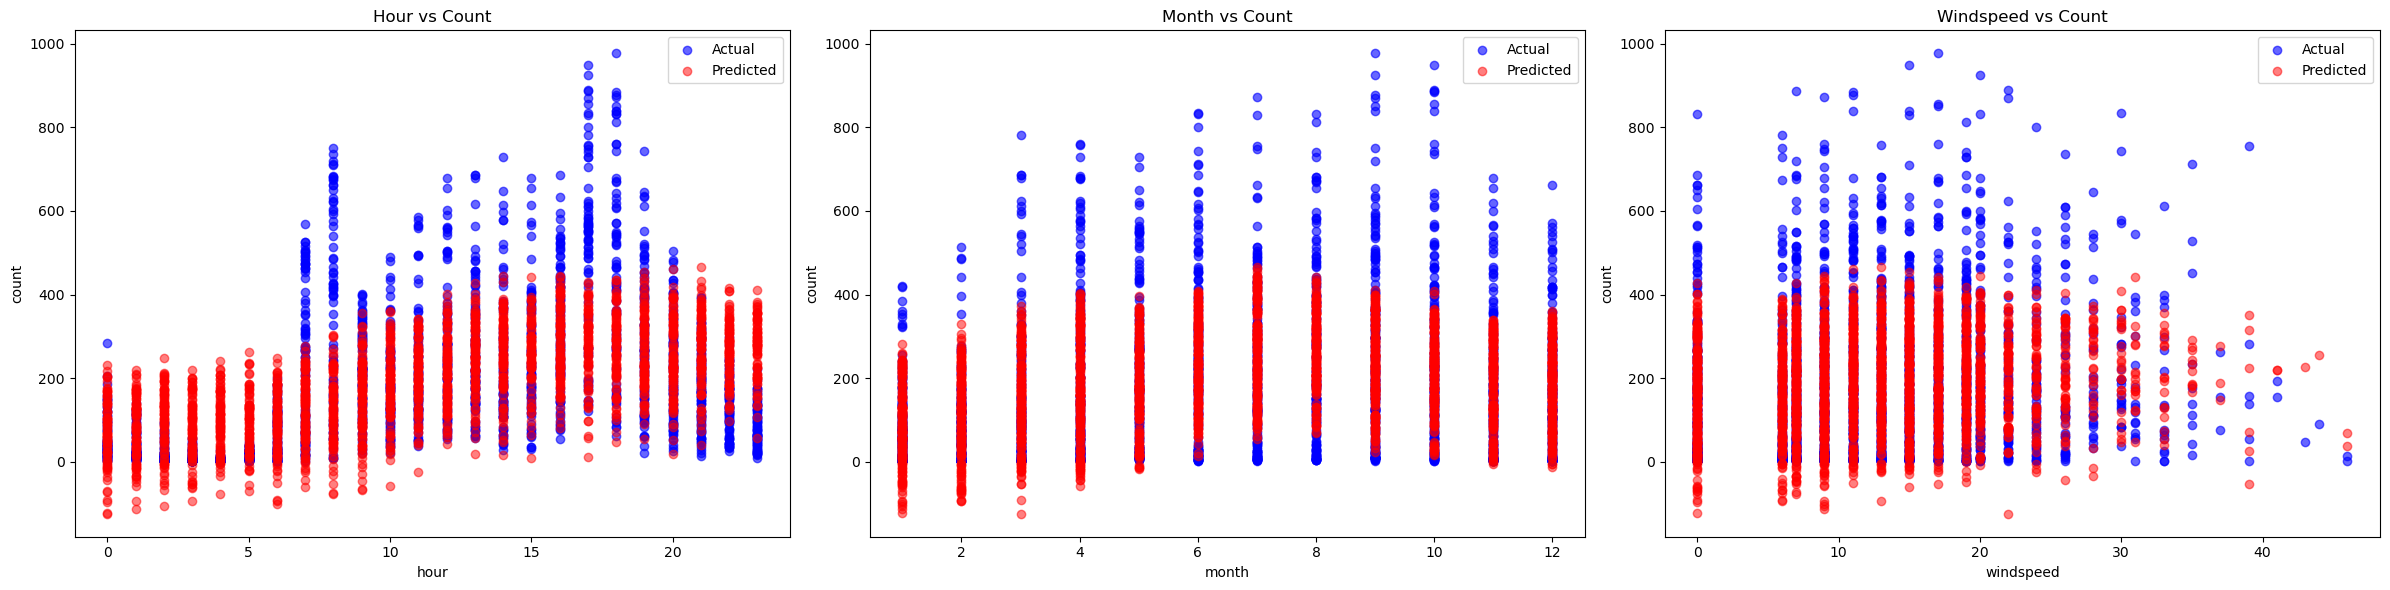

In [29]:
# hour / month / windspeed vs count (Actual vs Predicted)

fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# 1️⃣ hour vs count ⭐⭐⭐
axs[0].scatter(X_test['hour'], y_test, color='blue', label='Actual', alpha=0.6)
axs[0].scatter(X_test['hour'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('hour')
axs[0].set_ylabel('count')
axs[0].set_title('Hour vs Count')
axs[0].legend()

# 2️⃣ month vs count
axs[1].scatter(X_test['month'], y_test, color='blue', label='Actual', alpha=0.6)
axs[1].scatter(X_test['month'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('month')
axs[1].set_ylabel('count')
axs[1].set_title('Month vs Count')
axs[1].legend()

# 3️⃣ windspeed vs count
axs[2].scatter(X_test['windspeed'], y_test, color='blue', label='Actual', alpha=0.6)
axs[2].scatter(X_test['windspeed'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[2].set_xlabel('windspeed')
axs[2].set_ylabel('count')
axs[2].set_title('Windspeed vs Count')
axs[2].legend()

plt.tight_layout()
plt.show()
